Instead of the final sort being a reversion, we tested if it could also be profitable as a momentum. The most interesting part is using the momentum strategies and optimizing over Sharpe ratio, which appeared to lower volatility.

Sector 45 was the only one that appeared to on some occassions reward short term momentum.

### Experiment

### Conclusion

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.score_vars import ScoreVariables
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
run0 = RunManager('StatArbStrategy', 'run_0130')
run1 = RunManager('StatArbStrategy', 'run_0131')
run2 = RunManager('StatArbStrategy', 'run_0132')
run3 = RunManager('StatArbStrategy', 'run_0133')

In [4]:
run0.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.480451,0.039929,-999.0
1,drop_binaries,False,144,0.480451,0.039929,-999.0
2,holding_period,3,48,0.508033,0.040740,-999.0
3,holding_period,5,48,0.473007,0.039348,-999.0
4,holding_period,7,48,0.460312,0.039698,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",144,0.480451,0.039929,-999.0
6,momentum_flag,False,72,1.125227,0.094714,-999.0
7,momentum_flag,True,72,-0.164325,-0.014856,-999.0
8,per_side_count,10,72,0.532973,0.038752,-999.0
9,per_side_count,20,72,0.427929,0.041106,-999.0


In [5]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.261205,0.021259,-999.0
1,drop_binaries,False,144,0.261205,0.021259,-999.0
2,holding_period,3,48,0.298400,0.023507,-999.0
3,holding_period,5,48,0.260335,0.021222,-999.0
4,holding_period,7,48,0.224881,0.019049,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",144,0.261205,0.021259,-999.0
6,momentum_flag,False,72,0.563903,0.045332,-999.0
7,momentum_flag,True,72,-0.041493,-0.002814,-999.0
8,per_side_count,10,72,0.235982,0.016602,-999.0
9,per_side_count,20,72,0.286428,0.025917,-999.0


In [6]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.437869,0.026863,-999.0
1,drop_binaries,False,144,0.437869,0.026863,-999.0
2,holding_period,3,48,0.433345,0.025825,-999.0
3,holding_period,5,48,0.450314,0.027601,-999.0
4,holding_period,7,48,0.429949,0.027164,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",144,0.437869,0.026863,-999.0
6,momentum_flag,False,72,0.920276,0.057979,-999.0
7,momentum_flag,True,72,-0.044538,-0.004253,-999.0
8,per_side_count,10,72,0.462066,0.023885,-999.0
9,per_side_count,20,72,0.413672,0.029842,-999.0


In [7]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.314571,0.028819,-999.0
1,drop_binaries,False,144,0.314571,0.028819,-999.0
2,holding_period,3,48,0.463966,0.041385,-999.0
3,holding_period,5,48,0.272380,0.025142,-999.0
4,holding_period,7,48,0.207367,0.019931,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",144,0.314571,0.028819,-999.0
6,momentum_flag,False,72,0.453849,0.040482,-999.0
7,momentum_flag,True,72,0.175293,0.017156,-999.0
8,per_side_count,10,72,0.322290,0.025574,-999.0
9,per_side_count,20,72,0.306852,0.032065,-999.0


# Combination Searches

In [9]:
def compare_runs(run_name):
    run0 = RunManager('StatArbStrategy', run_name)
    
    drop_params = [('momentum_flag', True)]
    run1 = RunManager('StatArbStrategy', run_name, drop_params=drop_params)

    comb0 = CombinationSearch()
    comb0.set_selection_criteria('sharpe')
    comb0.params['training_epochs'] = 5
    comb0.add_run(run0)
    comb0.start()

    comb1 = CombinationSearch()
    comb1.set_selection_criteria('sharpe')
    comb1.params['training_epochs'] = 5
    comb1.add_run(run1)
    comb1.start()
    
    plt.figure()
    plt.plot(comb0.best_results_returns.dropna().cumsum(), 'b')
    plt.plot(comb1.best_results_returns.dropna().cumsum(), 'r')
    plt.show()

Reading and aggregating runs...



  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...




100%|██████████| 5/5 [00:58<00:00, 11.64s/it]


Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:53<00:00, 10.52s/it]


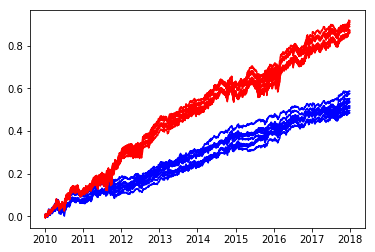

In [10]:
compare_runs('run_0130')

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:54<00:00, 11.08s/it]


Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:51<00:00, 10.29s/it]


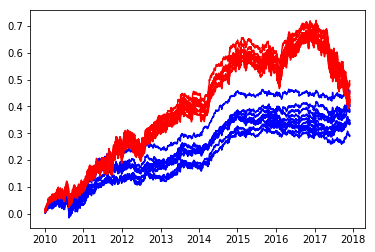

In [11]:
compare_runs('run_0131')

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:54<00:00, 11.09s/it]


Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:49<00:00,  9.96s/it]


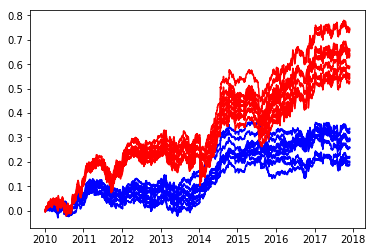

In [12]:
compare_runs('run_0132')

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:50<00:00, 10.18s/it]


Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:47<00:00,  9.54s/it]


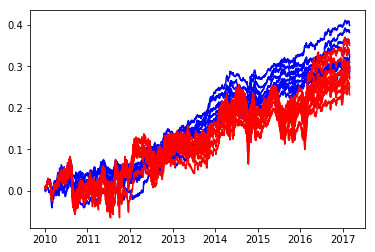

In [13]:
compare_runs('run_0133')

# Sector 20

Compare with and without momentum flag

In [15]:
comb0 = CombinationSearch()
comb0.set_selection_criteria('sharpe')
comb0.params['training_epochs'] = 5
comb0.add_run(run0)
comb0.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:57<00:00, 11.44s/it]


In [16]:
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 5
comb1.add_run(run1)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:52<00:00, 10.53s/it]


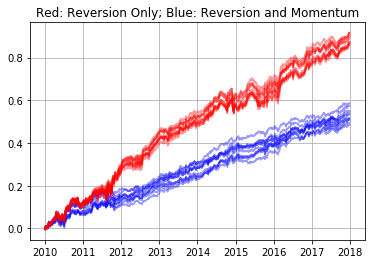

In [26]:
plt.figure()
plt.plot(comb0.best_results_returns.dropna().cumsum(), 'b', alpha=0.4)
plt.plot(comb1.best_results_returns.dropna().cumsum(), 'r', alpha=0.4)
plt.title('Red: Reversion Only; Blue: Reversion and Momentum')
plt.grid()
plt.show()

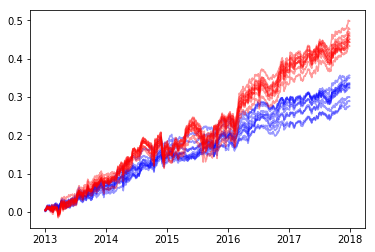

In [19]:
# Since 2013
t = dt.date(2013, 1, 1)
plt.figure()
plt.plot(comb0.best_results_returns.loc[t:].dropna().cumsum(), 'b', alpha=0.4)
plt.plot(comb1.best_results_returns.loc[t:].dropna().cumsum(), 'r', alpha=0.4)
plt.show()

In [20]:
get_stats(comb0.best_results_returns.loc[t:].dropna()).mean(axis=1)

Total               0.32242
Mean                0.00027
Std                 0.00228
Skew                0.01283
Kurt                0.91000
Sharpe              1.78921
Sortino             3.21158
MinRet             -0.00899
WinP                0.54948
DD%                -0.02655
DDDays             67.10000
UnderwaterDays    113.80000
Underwater%        -0.02054
TimeAtHighs         0.17200
VaR_5perc          -0.00347
CVaR_5perc         -0.00466
LPM_2               0.00216
dtype: float64

In [21]:
get_stats(comb1.best_results_returns.loc[t:].dropna()).mean(axis=1)

Total               0.45835
Mean                0.00039
Std                 0.00353
Skew                0.00954
Kurt                1.83500
Sharpe              1.63823
Sortino             2.89368
MinRet             -0.01503
WinP                0.54640
DD%                -0.06455
DDDays            128.40000
UnderwaterDays    133.90000
Underwater%        -0.06424
TimeAtHighs         0.16190
VaR_5perc          -0.00516
CVaR_5perc         -0.00754
LPM_2               0.00528
dtype: float64

### Scale results to achieve same PL

In [22]:
t = dt.date(2013, 1, 1)
x1 = comb0.best_results_returns.loc[t:].dropna() * 1.45
x2 = comb1.best_results_returns.loc[t:].dropna()

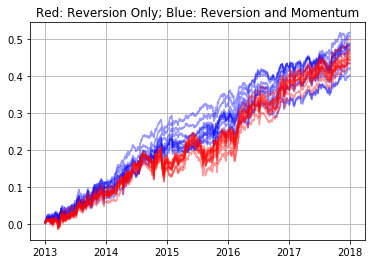

In [27]:
plt.figure()
plt.plot(x1.cumsum(), 'b', alpha=0.4)
plt.plot(x2.cumsum(), 'r', alpha=0.4)
plt.title('Red: Reversion Only; Blue: Reversion and Momentum')
plt.grid()
plt.show()

In [24]:
get_stats(x1).mean(axis=1)
# Half the draw down, higher sharpe

Total               0.46752
Mean                0.00037
Std                 0.00329
Skew                0.01283
Kurt                0.91000
Sharpe              1.78921
Sortino             3.21158
MinRet             -0.01302
WinP                0.54948
DD%                -0.03851
DDDays             66.80000
UnderwaterDays    113.80000
Underwater%        -0.02978
TimeAtHighs         0.17200
VaR_5perc          -0.00504
CVaR_5perc         -0.00676
LPM_2               0.00454
dtype: float64

In [25]:
get_stats(x2).mean(axis=1)

Total               0.45835
Mean                0.00039
Std                 0.00353
Skew                0.00954
Kurt                1.83500
Sharpe              1.63823
Sortino             2.89368
MinRet             -0.01503
WinP                0.54640
DD%                -0.06455
DDDays            128.40000
UnderwaterDays    133.90000
Underwater%        -0.06424
TimeAtHighs         0.16190
VaR_5perc          -0.00516
CVaR_5perc         -0.00754
LPM_2               0.00528
dtype: float64

In [29]:
df = rollup_returns(comb0.best_results_returns.dropna())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.033509,-0.016197,0.059180,-0.001628,0.074864
2011,0.023568,0.018244,-0.011991,0.003043,0.032864
2012,0.003319,0.007868,0.024476,0.018758,0.054421
2013,0.017666,0.018251,0.018945,0.013293,0.068155
2014,0.031451,0.012537,0.031135,0.009240,0.084363
2015,0.001351,-0.002837,0.020595,0.023102,0.042212
2016,0.040111,0.024013,-0.000671,0.019338,0.082790
2017,0.006687,0.016523,0.001826,0.020533,0.045569


In [30]:
df = rollup_returns(comb1.best_results_returns.dropna())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.044876,-0.003710,0.095784,-0.015813,0.121136
2011,0.032861,0.032503,-0.014175,0.089954,0.141142
2012,0.038798,0.006833,0.044606,0.064882,0.155119
2013,-0.002679,0.029812,0.031549,0.023173,0.081855
2014,0.028698,0.033895,0.009544,-0.004761,0.067376
2015,0.003679,0.048955,-0.033990,0.055782,0.074427
2016,0.063582,0.022029,-0.004064,0.047115,0.128662
2017,0.020523,0.038093,0.002150,0.030230,0.090996


# Sector 45

In [31]:
run2 = RunManager('StatArbStrategy', 'run_0133')
drop_params = [('momentum_flag', True)]
run3 = RunManager('StatArbStrategy', 'run_0133', drop_params=drop_params)

In [32]:
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 5
comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:48<00:00,  9.58s/it]


In [33]:
comb3 = CombinationSearch()
comb3.set_selection_criteria('sharpe')
comb3.params['training_epochs'] = 5
comb3.add_run(run3)
comb3.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:46<00:00,  9.23s/it]


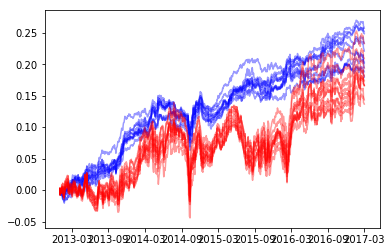

In [34]:
# Since 2013
t = dt.date(2013, 1, 1)
plt.figure()
plt.plot(comb2.best_results_returns.loc[t:].dropna().cumsum(), 'b', alpha=0.4)
plt.plot(comb3.best_results_returns.loc[t:].dropna().cumsum(), 'r', alpha=0.4)
plt.show()